In [47]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import DBSCAN

In [38]:
data = pd.read_csv("D:\Study\DS\Clustering_Bank.csv")

In [45]:
wholesale = pd.read_csv("D:\Study\DS\Wholesale customers data.csv")

In [39]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [40]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


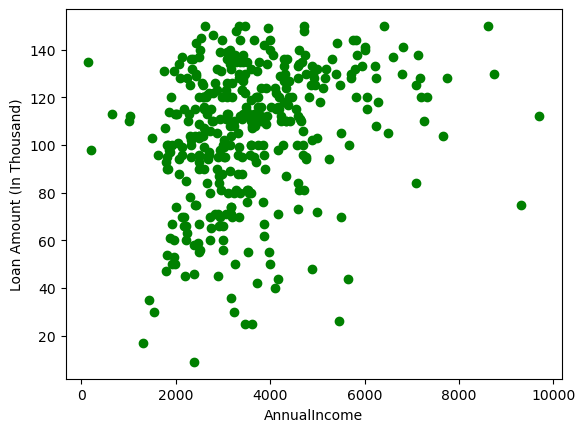

In [41]:
X = data[["LoanAmount","ApplicantIncome"]]
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='green')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousand)')
plt.show()

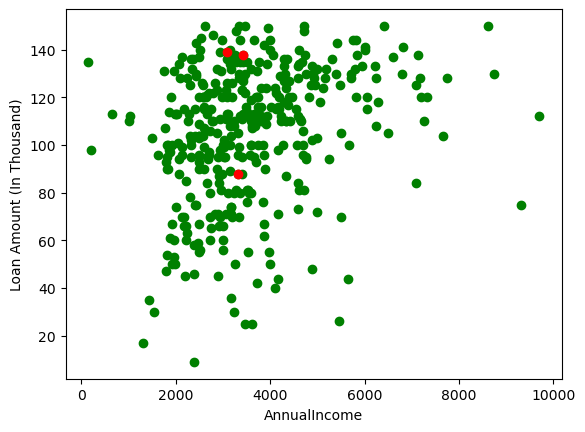

In [42]:
K = 3
Centroid = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='green')
plt.scatter(Centroid["ApplicantIncome"],Centroid["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousand)')
plt.show()

In [23]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroid.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
            
        X[i]=ED
        i=i+1
        
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1]<min_dist:
                min_dist=row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroid_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroid_new['LoanAmount'] - Centroid['LoanAmount']).sum() + (Centroid_new['ApplicantIncome'] - Centroid['ApplicantIncome']).sum()
        print(diff.sum())
    Centroid = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

C:\Users\Shubh\AppData\Local\Temp\ipykernel_24980\225530879.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\Shubh\AppData\Local\Temp\ipykernel_24980\225530879.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\Shubh\AppData\Local\Temp\ipykernel_24980\225530879.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

269.99563546979203
30.677153057190424


C:\Users\Shubh\AppData\Local\Temp\ipykernel_24980\225530879.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\Shubh\AppData\Local\Temp\ipykernel_24980\225530879.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\Shubh\AppData\Local\Temp\ipykernel_24980\225530879.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

-37.02109095638424
-18.485563879564225


C:\Users\Shubh\AppData\Local\Temp\ipykernel_24980\225530879.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\Shubh\AppData\Local\Temp\ipykernel_24980\225530879.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\Shubh\AppData\Local\Temp\ipykernel_24980\225530879.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

-9.190752402517077
-9.19844100901777


C:\Users\Shubh\AppData\Local\Temp\ipykernel_24980\225530879.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\Shubh\AppData\Local\Temp\ipykernel_24980\225530879.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\Shubh\AppData\Local\Temp\ipykernel_24980\225530879.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

-9.237706177129652
0.0


C:\Users\Shubh\AppData\Local\Temp\ipykernel_24980\225530879.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


In [24]:
X

,LoanAmount,ApplicantIncome,1,2,3,Cluster
0,128.0,4583,1929.786213,549.706662,2085.250941,2
1,66.0,3000,3513.174648,1034.521934,503.013025,3
2,120.0,2583,3929.767475,1450.632322,87.961117,3
3,141.0,6000,513.218472,1966.652040,3502.297968,1
4,95.0,2333,4179.839177,1700.660175,164.991055,3
...,...,...,...,...,...,...
376,128.0,5703,809.812174,1669.503528,3205.172854,1
377,108.0,3232,3280.787556,801.598078,734.102962,3
378,71.0,2900,3613.092818,1134.258480,402.898105,3
379,40.0,4106,2408.079716,100.539911,1609.054208,2


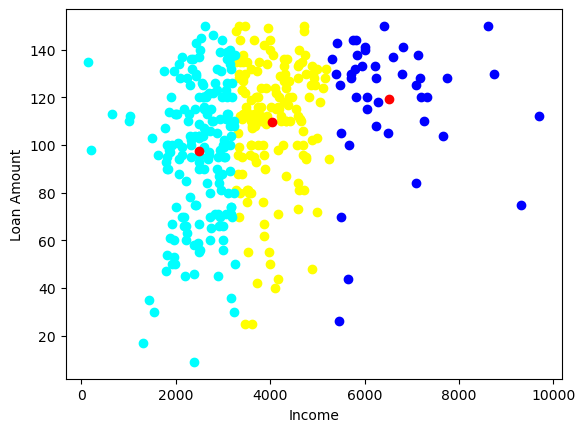

In [28]:
color=['blue','yellow','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroid["ApplicantIncome"],Centroid["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,init='k-means++')

kmeans.fit(X)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

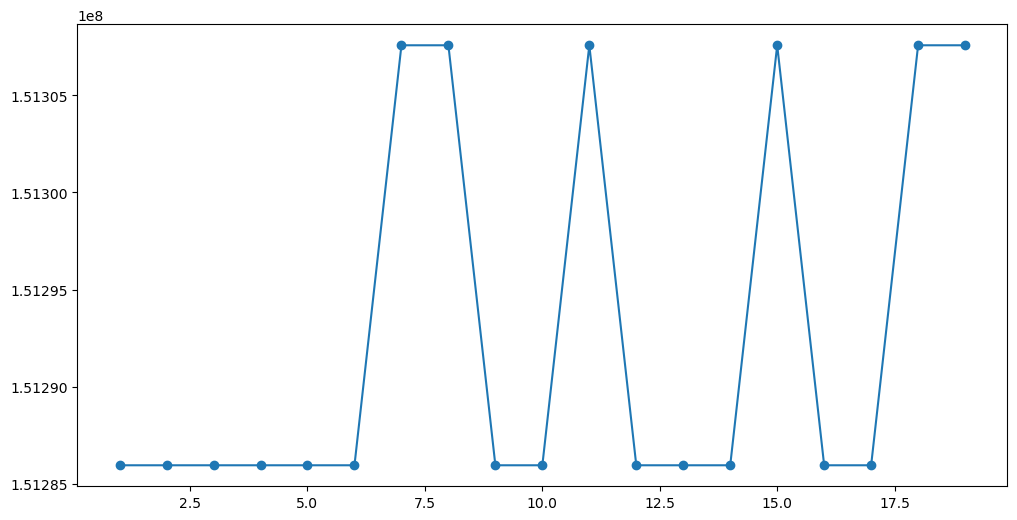

In [44]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters=3,init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    
    
frame = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')

In [48]:
df=pd.read_csv("D:\Study\DS\Mall_Customers.csv")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [60]:
df.describe()

,Age,Income,Spend_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [59]:
df = df.rename(columns={"Annual Income (k$)":"Income","Spending Score (1-100)":"Spend_Score"})

In [ ]:
df=df.drop(["CustomerID"],axis=1)

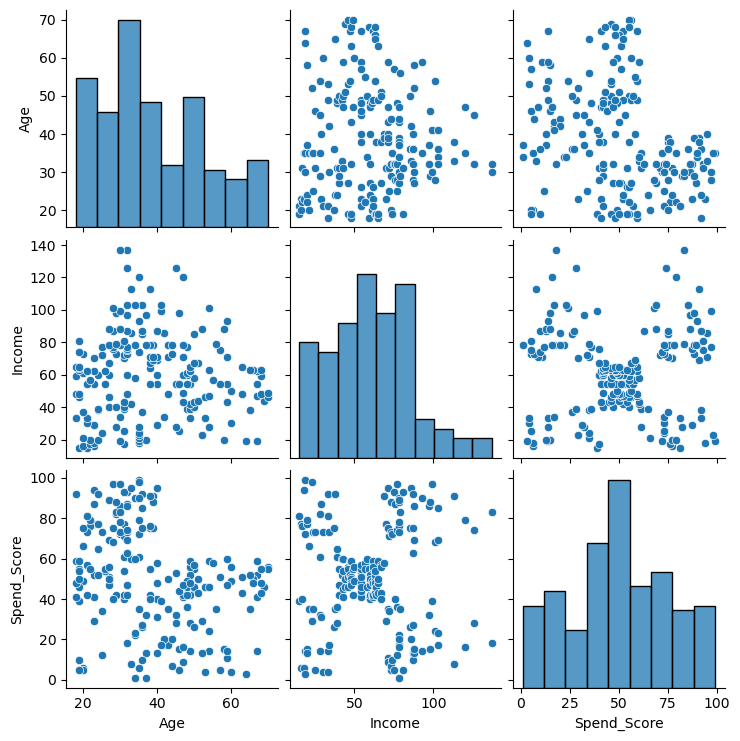

In [61]:
sns.pairplot(df)

<Axes: >

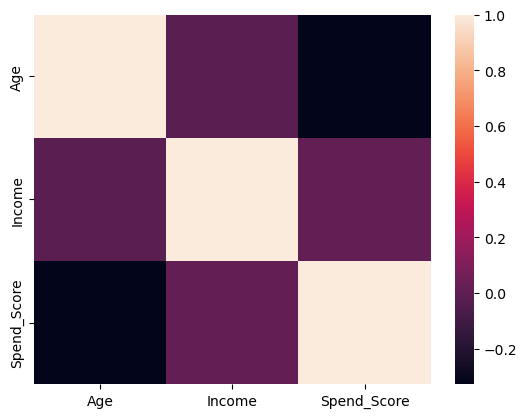

In [64]:
sns.heatmap(df.iloc[:,1:].corr())

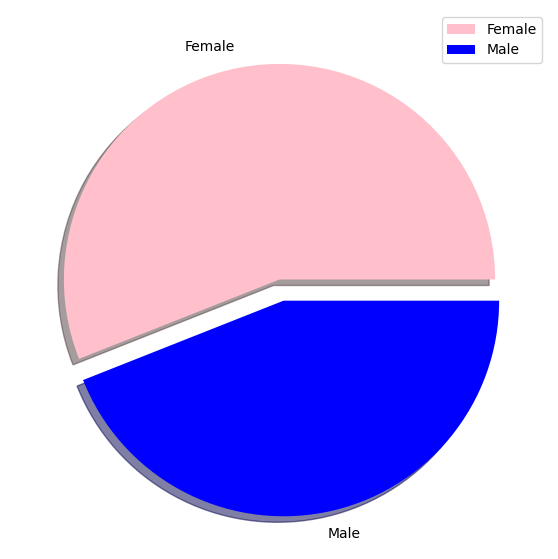

In [73]:
plt.figure(figsize=(7,7))
size=df['Gender'].value_counts()
label=['Female','Male']
color=['Pink','Blue']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  Text(35, 0, '53'),
  Text(36, 0, '54'),
  T

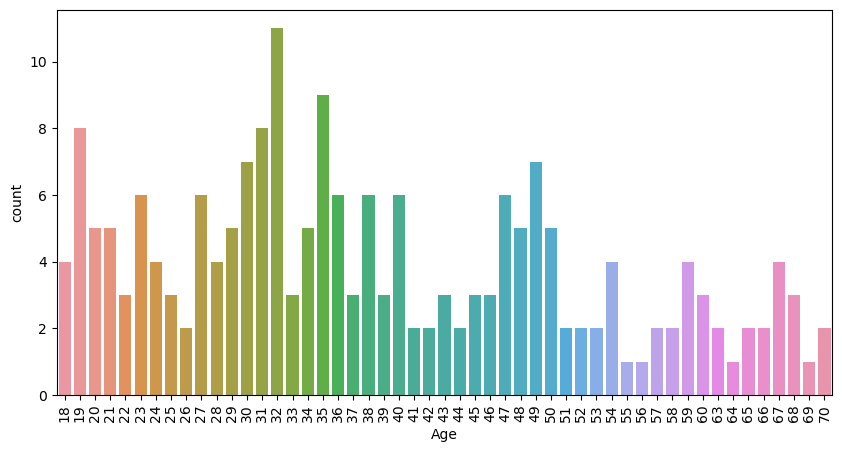

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Age'],data=df)
plt.xticks(rotation=90)

<Axes: >

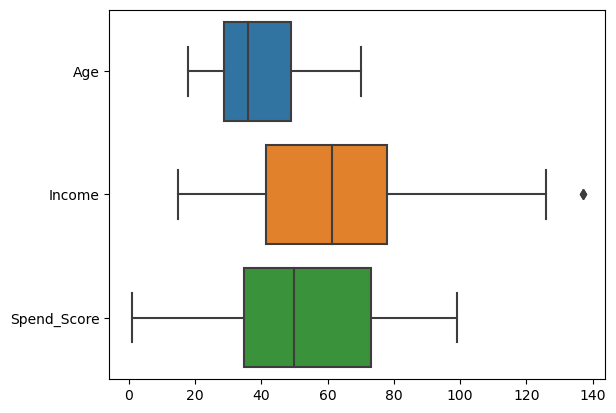

In [75]:
sns.boxplot(df,orient='h')

In [ ]:
age = right skew
income = left skew
spend score = right skew

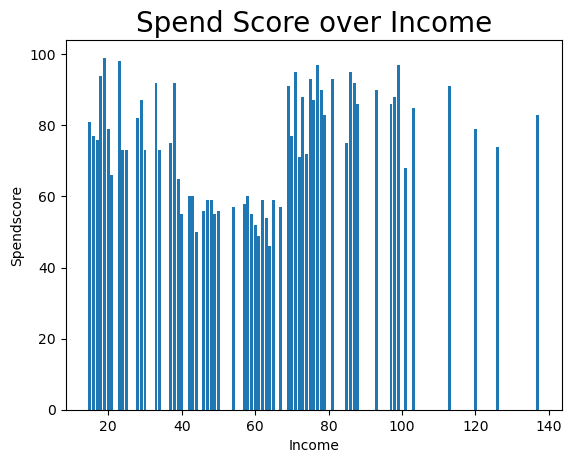

In [79]:
plt.bar(df['Income'],df['Spend_Score'])
plt.title('Spend Score over Income',fontsize=20)
plt.xlabel('Income')
plt.ylabel('Spendscore')
plt.show()

In [86]:
X = df.iloc[:,[2,3]].values

In [87]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [88]:
model = db.fit(X)

In [89]:
label=model.labels_

In [90]:
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [91]:
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

n_clusters=len(set(label))-(1 if -1 in label else 0)

print('no of clusters:',n_clusters)

no of clusters: 9


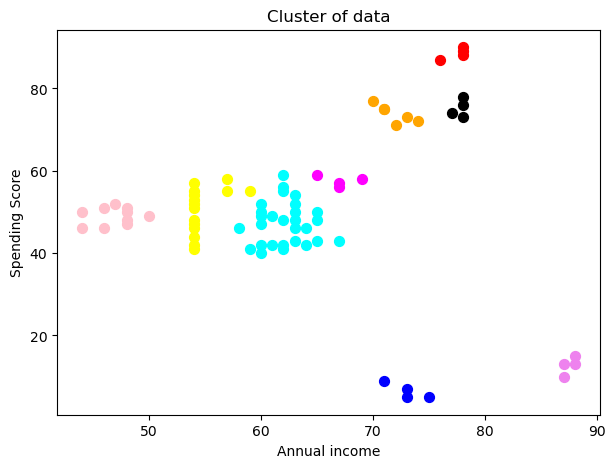

In [93]:
y_means = db.fit_predict(X)
plt.figure(figsize=(7,5))
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],s = 50, c = 'pink')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],s = 50, c = 'yellow')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],s = 50, c = 'cyan')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],s = 50, c = 'magenta')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],s = 50, c = 'orange')
plt.scatter(X[y_means == 5,0],X[y_means == 5,1],s = 50, c = 'blue')
plt.scatter(X[y_means == 6,0],X[y_means == 6,1],s = 50, c = 'red')
plt.scatter(X[y_means == 7,0],X[y_means == 7,1],s = 50, c = 'black')
plt.scatter(X[y_means == 8,0],X[y_means == 8,1],s = 50, c = 'violet')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.title('Cluster of data')
plt.show()

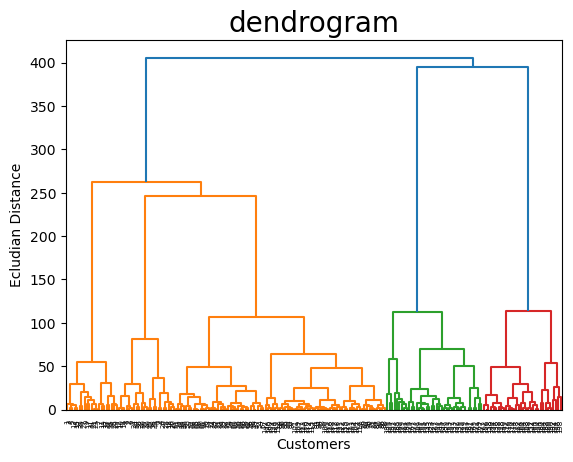

In [95]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('dendrogram',fontsize=20)
plt.xlabel('Customers')
plt.ylabel('Ecludian Distance')
plt.show()

In [105]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

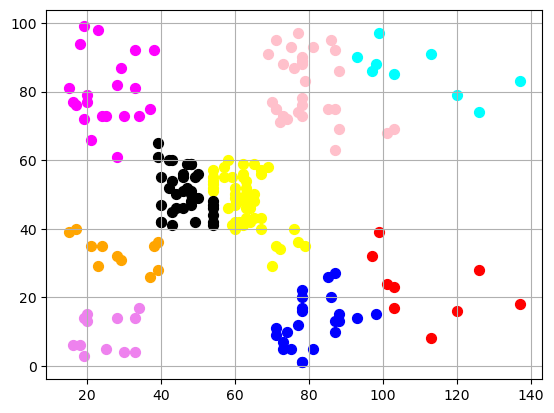

In [106]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=9,metric='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)


plt.scatter(X[y_hc == 0,0],X[y_hc == 0,1],s=50,c='pink')
plt.scatter(X[y_hc == 1,0],X[y_hc == 1,1],s=50,c='yellow')
plt.scatter(X[y_hc == 2,0],X[y_hc == 2,1],s=50,c='cyan')
plt.scatter(X[y_hc == 3,0],X[y_hc == 3,1],s=50,c='magenta')
plt.scatter(X[y_hc == 4,0],X[y_hc == 4,1],s=50,c='orange')
plt.scatter(X[y_hc == 5,0],X[y_hc == 5,1],s=50,c='blue')
plt.scatter(X[y_hc == 6,0],X[y_hc == 6,1],s=50,c='red')
plt.scatter(X[y_hc == 7,0],X[y_hc == 7,1],s=50,c='black')
plt.scatter(X[y_hc == 8,0],X[y_hc == 8,1],s=50,c='violet')
plt.grid()
plt.show()

In [107]:
from ucimlrepo import fetch_ucirepo

iris = fetch_ucirepo(id=53)

X = iris.data.features
y = iris.data.targets
print(X)
print(y)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
              class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


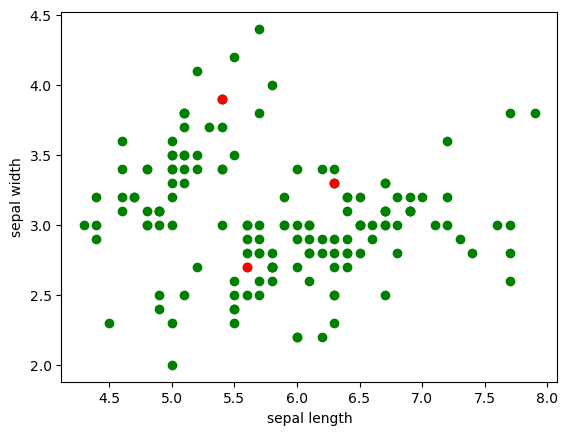

In [108]:
K = 3
Centroid = (X.sample(n=K))
plt.scatter(X["sepal length"],X["sepal width"],c='green')
plt.scatter(Centroid["sepal length"],Centroid["sepal width"],c='red')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [111]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,init='k-means++')

kmeans.fit(X)
pred = kmeans.predict(X)
pred

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])